<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/Paphosweather_compare_last_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last year weather purchased from https://home.openweathermap.org/marketplace/my_orders

In [1]:
from datetime import date
from datetime import datetime,date
import time
import pandas as pd
import numpy as np
import statistics as st
from dateutil import parser

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Use bash commands to copy the most recent file from Google Drive to Colab environment
!cd /content/drive/MyDrive/weather && \
latest_file=$(ls -t | head -1) && \
echo $latest_file && \
cp $latest_file /content/


paphos2024-07-29.csv


In [5]:
file="paphos2024-07-29.csv"

In [9]:
import pandas as pd


thisweek=pd.read_csv(file,usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])
thisweek.set_index('datetime', inplace=True)
thisweek=thisweek.between_time('08:00', '18:00')

thisweek.rename(columns={'temp': 'temp-now'}, inplace=True)
thisweek.rename(columns={'feelslike': 'feelslike-now'}, inplace=True)
thisweek.rename(columns={'humidity': 'humidity-now'}, inplace=True)


In [30]:
lastyear=pd.read_csv("https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/stats/paphos-2023-2023-weather.csv",usecols=['dt_iso','temp','feels_like','humidity'])

# Function to clean and convert the timestamp strings
def clean_timestamp(timestamp):
    # Remove the " UTC" part and convert to datetime
    cleaned_timestamp = timestamp.replace(" UTC", "")
    return pd.to_datetime(cleaned_timestamp)

# Apply the function to the Timestamp column
lastyear['dt_iso'] = lastyear['dt_iso'].apply(clean_timestamp)
lastyear['datetime'] = pd.to_datetime(lastyear['dt_iso'])

lastyear.set_index('datetime', inplace=True)
lastyear=lastyear.between_time('08:00', '18:00')



In [35]:
lastyear.rename(columns={'temp': 'temp-past'}, inplace=True)
lastyear.rename(columns={'feels_like': 'feelslike-past'}, inplace=True)
lastyear.rename(columns={'humidity': 'humidity-past'}, inplace=True)

In [36]:
lastyear['match'] = lastyear.index.strftime('%m-%d %H:%M')
thisweek['match'] = thisweek.index.strftime('%m-%d %H:%M')

In [37]:
lastyear.drop(columns=['dt_iso'], inplace=True)

In [42]:
lastyear=lastyear.drop_duplicates(subset='match')

In [51]:
intersection = pd.merge(lastyear, thisweek, on='match', how='inner')


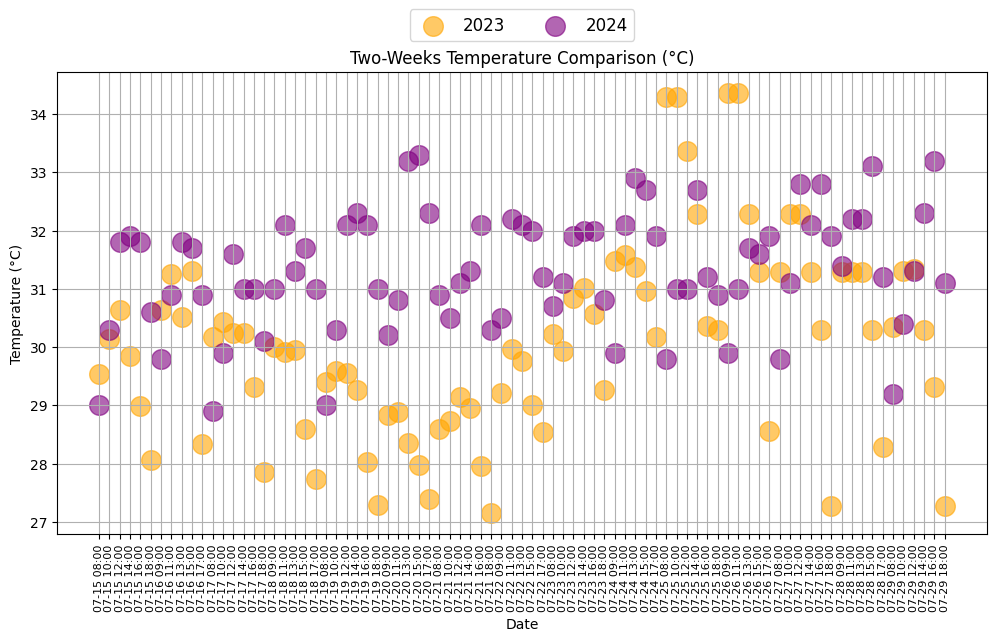

In [75]:

import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your DataFrame)
df = intersection

df=df.iloc[::2, :]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.scatter(df['match'], df['temp-past'], s=200, alpha=0.6, color="orange", label='2023')
ax.scatter(df['match'], df['temp-now'], s=200, alpha=0.6, color="purple", label='2024')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Temperature (°C)')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

# Set the title
plt.title('Two-Weeks Temperature Comparison (°C)')

# Add legend
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)

plt.grid()

# Show the plot
plt.show()


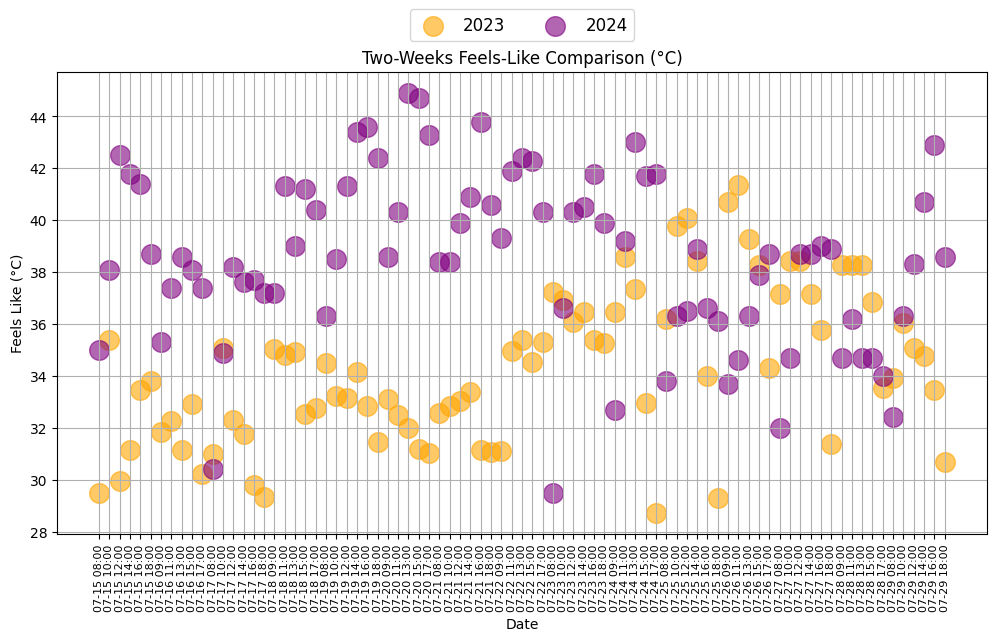

In [76]:
import matplotlib.pyplot as plt






# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))


ax.scatter(df['match'], df['feelslike-past'], s=200, alpha=0.6, color="orange", label='2023')
ax.scatter(df['match'], df['feelslike-now'], s=200, alpha=0.6, color="purple", label='2024')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Feels Like (°C)')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

# Set the title
plt.title('Two-Weeks Feels-Like Comparison (°C)')

# Add legend
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)
plt.grid()

# Show the plot
plt.show()


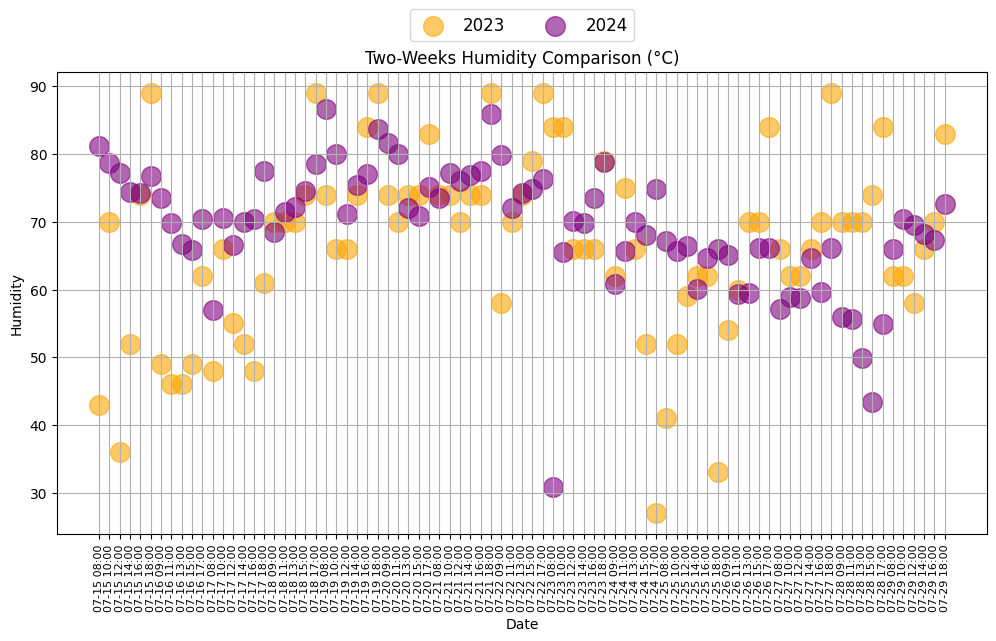

In [77]:
import matplotlib.pyplot as plt



# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.scatter(df['match'], df['humidity-past'], s=200, alpha=0.6, color="orange", label='2023')
ax.scatter(df['match'], df['humidity-now'], s=200, alpha=0.6, color="purple", label='2024')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Humidity')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

# Set the title
plt.title('Two-Weeks Humidity Comparison (°C)')

# Add legend
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)


plt.grid()

# Show the plot
plt.show()
